<a href="https://colab.research.google.com/github/Somesh140/iNeauron_FSDS_Assignments/blob/main/Interview_based_assesment/python/Q9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
URL="https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"

In [4]:
#load the data in dataframe
data=pd.read_csv(URL)

In [5]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [9]:
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         60551
Eligibility unknown as battery range has not been researched    53446
Not eligible due to low battery range                           16446
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [10]:
# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_cars = data[data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] != "Clean Alternative Fuel Vehicle Eligible"]
non_clean_cars_info = non_clean_cars[["Make", "Model"]]
print("Cars that do not qualify for clean alternative fuel vehicle:")
print(non_clean_cars_info)

Cars that do not qualify for clean alternative fuel vehicle:
          Make    Model
6         FORD   FUSION
7         AUDI     Q5 E
8         FORD    C-MAX
11       TESLA  MODEL Y
14        FORD    C-MAX
...        ...      ...
130437     BMW     530E
130438   TESLA  MODEL Y
130439  NISSAN     LEAF
130440   TESLA  MODEL Y
130442   TESLA  MODEL 3

[69892 rows x 2 columns]


In [12]:
# Get all TESLA cars with the model year and model type made in Bothell City
tesla_bothell = data[(data["Make"] == "TESLA") & (data["City"] == "Bothell")]
tesla_bothell_info = tesla_bothell[["Model Year", "Model"]]
print("\nTESLA cars made in Bothell City:")
print(tesla_bothell_info)


TESLA cars made in Bothell City:
        Model Year    Model
39            2020  MODEL 3
217           2022  MODEL 3
218           2022  MODEL Y
222           2018  MODEL 3
292           2017  MODEL X
...            ...      ...
129778        2019  MODEL 3
129954        2021  MODEL 3
129976        2014  MODEL S
130295        2022  MODEL 3
130392        2018  MODEL 3

[2407 rows x 2 columns]


In [13]:
# Get all the cars that have an electric range of more than 100 and were made after 2015
electric_cars = data[(data["Electric Range"] > 100) & (data["Model Year"] > 2015)]
electric_cars_info = electric_cars[["Make", "Model"]]
print("\nCars with an electric range > 100 made after 2015:")
print(electric_cars_info)


Cars with an electric range > 100 made after 2015:
          Make    Model
0        TESLA  MODEL X
2        TESLA  MODEL 3
4        TESLA  MODEL S
12       TESLA  MODEL 3
13       TESLA  MODEL 3
...        ...      ...
130417   TESLA  MODEL Y
130428  NISSAN     LEAF
130432   TESLA  MODEL Y
130436   TESLA  MODEL 3
130441   TESLA  MODEL X

[34066 rows x 2 columns]


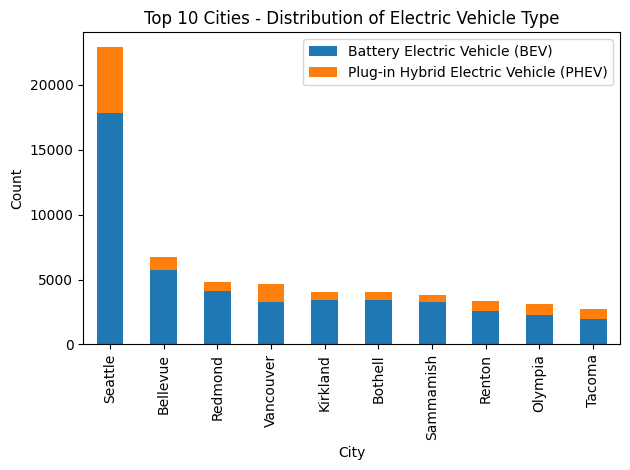

In [20]:
# Get the count of electric vehicle types by city
city_ev_type_count = data.groupby(["City", "Electric Vehicle Type"]).size().unstack().fillna(0)

# Select the top N cities with the highest count
top_cities = 10  # Modify this value as per your preference
top_cities_count = city_ev_type_count.sum(axis=1).nlargest(top_cities).index
top_cities_data = city_ev_type_count.loc[top_cities_count]

# Plot the distribution for the top N cities
top_cities_data.plot(kind="bar", stacked=True)
plt.xlabel("City")
plt.ylabel("Count")
plt.title(f"Top {top_cities} Cities - Distribution of Electric Vehicle Type")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()
